In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calmap
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# Main Angle and Goals of this Project:
1. Import clean, formatted, relevant data
2. Explore Data and do basic analysis 
3. See if any of the risk factors have significant correlation with diagnosis for cervical related illness

# Outline
1. Import Data
2. Clean Data
3. EDA

# 

# Task 1: Import Relevant Data 

1. Import the entire dataset to get an idea of the columns
2. As I want to assess risk factors and not dive into the individual STD diagnoses and screening methods, 
I will only grab the first 13 columns (general risk factors) and columns 28-36 (diagnoses and biopsy)  

In [2]:
# import entirty of original dataframe to see what data I want to work with 

df = pd.read_csv('cervical.csv')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

## Import Relevant Data:

In [3]:
# Import new dataframe (will overwrite the original) based on behaviors of women only along with with the diagnoses columns only

df = pd.read_csv('cervical.csv',
                          usecols= list(range(13), ) + list(range(28,36)),
                          header=0,
                          names=['age','no_sxpartners', 'age_virgin', 'no_preg', 'smokes', 'smokes_yrs', 
                                 'smokes_pcks', 'horm_contra', 'horm_contra_years','IUD', 
                                 'IUD_yrs', 'STDs', 'no_STDs', 'dxCancer', 'dxCIN', 'dxHPV', 'dx',
                                'hinselmann', 'schiller', 'citology', 'biopsy']
                         
                    )

## Evaluate Columns:
- What do the values of each column look like?
- Is the data type appropriate for the range and type of data?

This step will give me a better sense of the data as well as take a quick glance of whether there are missing values 

In [4]:
# create function that returns the unique values for every datatype, the amount, and the dtype

def unique_values(df):
    for col in df.columns:
        print(f'{col}: {df[col].unique()}')
        print(f'total_unique: {df[col].nunique()}')
        print(f'dtypes: {df[col].dtypes}')
        print('--' * 50)

In [5]:
unique_values(df)

age: [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
total_unique: 44
dtypes: int64
----------------------------------------------------------------------------------------------------
no_sxpartners: ['4' '1' '5' '3' '2' '6' '?' '7' '15' '8' '10' '28' '9']
total_unique: 13
dtypes: object
----------------------------------------------------------------------------------------------------
age_virgin: ['15' '14' '?' '16' '21' '23' '17' '26' '20' '25' '18' '27' '19' '24' '32'
 '13' '29' '11' '12' '22' '28' '10']
total_unique: 22
dtypes: object
----------------------------------------------------------------------------------------------------
no_preg: ['1' '4' '2' '6' '3' '5' '?' '8' '7' '0' '11' '10']
total_unique: 12
dtypes: object
----------------------------------------------------------------------------------------------------
smokes: ['0' '1' '?']
total_unique: 3
dtypes: object
-------------------

## Task 2: Working with Duplicate and Missing Values
1. Check for duplicated rows
2. Check for missing values 
3. Set Appropriate data types

### Dealing with Duplicates:

In [6]:
# check for duplicated rows

df.duplicated().sum()

23

In [7]:
# inspect duplicated rows

df.loc[df.duplicated() == True].head()

,age,no_sxpartners,age_virgin,no_preg,smokes,smokes_yrs,smokes_pcks,horm_contra,horm_contra_years,IUD,...,STDs,no_STDs,dxCancer,dxCIN,dxHPV,dx,hinselmann,schiller,citology,biopsy
66,34,3,19,3,0,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
234,25,?,18,2,0,0,0,?,?,?,...,?,?,0,0,0,0,0,0,0,0
255,25,2,18,2,0,0,0,1,0.25,0,...,0,0,0,0,0,0,0,0,0,0
356,18,1,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,18,1,18,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# drop duplicated rows

df = df.drop_duplicates()

df.duplicated().sum()

0

### Dealing with Missing Values 

In [9]:
# percentage of missing values? --> THE OUTPUT IS MISLEADING!
# based on cells above, the missing values are populated with a "?"

(df.isna().sum() / len(df)) 

age                  0.0
no_sxpartners        0.0
age_virgin           0.0
no_preg              0.0
smokes               0.0
smokes_yrs           0.0
smokes_pcks          0.0
horm_contra          0.0
horm_contra_years    0.0
IUD                  0.0
IUD_yrs              0.0
STDs                 0.0
no_STDs              0.0
dxCancer             0.0
dxCIN                0.0
dxHPV                0.0
dx                   0.0
hinselmann           0.0
schiller             0.0
citology             0.0
biopsy               0.0
dtype: float64

In [10]:
# see what columns have '?' aka missing values 

for col in df.columns:
    print(f"{col}: {df.loc[df[str(col)] == '?', str(col)].count()}")

age: 0
no_sxpartners: 25
age_virgin: 7
no_preg: 56
smokes: 13
smokes_yrs: 13
smokes_pcks: 13
horm_contra: 103
horm_contra_years: 103
IUD: 112
IUD_yrs: 112
STDs: 100
no_STDs: 100
dxCancer: 0
dxCIN: 0
dxHPV: 0
dx: 0
hinselmann: 0
schiller: 0
citology: 0
biopsy: 0


## Replacing Missing Values 

In [11]:
# seeing how many '?' in a column so that it can be used in a conditional statement 
df.loc[df.no_sxpartners == '?', 'no_sxpartners'].count()

25

In [12]:
# create a list of the column names with missing values
# will then iterate through and replace missing values in later cell

col_with_missing = []

for col in df.columns:
    if df.loc[df[col] == '?', col].count() > 1:
        col_with_missing.append(col)
        
col_with_missing

['no_sxpartners',
 'age_virgin',
 'no_preg',
 'smokes',
 'smokes_yrs',
 'smokes_pcks',
 'horm_contra',
 'horm_contra_years',
 'IUD',
 'IUD_yrs',
 'STDs',
 'no_STDs']

In [13]:
# iterate through columns and replace missing data

for col in col_with_missing:
    df[str(col)] = df[str(col)].replace('?', np.nan)

In [14]:
# double check if '?' converted to np.NaN

df.isna().sum()

age                    0
no_sxpartners         25
age_virgin             7
no_preg               56
smokes                13
smokes_yrs            13
smokes_pcks           13
horm_contra          103
horm_contra_years    103
IUD                  112
IUD_yrs              112
STDs                 100
no_STDs              100
dxCancer               0
dxCIN                  0
dxHPV                  0
dx                     0
hinselmann             0
schiller               0
citology               0
biopsy                 0
dtype: int64

### Visualize missing data

<AxesSubplot:>

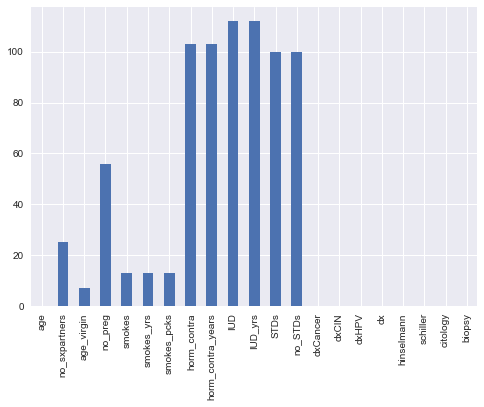

In [15]:
df.isna().sum().plot(kind='bar')

# Task 3: Data Validation and Data Type Conversion
1. Set data types
2. Check values of columns and make sure they make sense 
3. Fix any erroneous or inaccurate values

### 1. Set the Data Types

In [16]:
# first 4 columns to Int8
for i in range(0,5):
    df[df.columns[i]] = df[df.columns[i]].astype('Int8')

In [17]:
# last 8 columns as a bool

for i in range(13,21):
    df[df.columns[i]] = df[df.columns[i]].astype('bool')

In [18]:
# setting the dtypes for the rest of the columns

df = df.astype({'smokes_yrs':'float', 'smokes_pcks':'float', 'horm_contra':'Int8', 'horm_contra_years':'float',
                'IUD':'Int8', 'IUD_yrs':'float', 'no_STDs': 'Int8'}
              )

In [19]:
# mapping the 0 and 1 to False and True and then setting to bool dtype

df['STDs'] = df.STDs.map({'0':False, '1':True}).astype('bool')

### 2a. Check Values


In [20]:
df.describe()

,age,no_sxpartners,age_virgin,no_preg,smokes,smokes_yrs,smokes_pcks,horm_contra,horm_contra_years,IUD,IUD_yrs,no_STDs
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,723.000000,735.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,0.527621,0.180952
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,1.965439,0.568153
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,4.000000


The only column with questionable data is the Dx column:
- Dx should be True if __either__ DxCancer, DxCIN, or DxHPV are True 
- Dx should be False if __all__ DxCancer, DxCIN, and DxHPV are False

Dx returns False in 5 occasions where it should actually be True

In [21]:
# test to find the rows with incorrect Dx values and return the rows
mask = (df['dx'] == False) & ((df['dxCancer'] == True) | (df['dxCIN'] == True) | (df['dxHPV'] == True))

df.loc[mask]

,age,no_sxpartners,age_virgin,no_preg,smokes,smokes_yrs,smokes_pcks,horm_contra,horm_contra_years,IUD,...,STDs,no_STDs,dxCancer,dxCIN,dxHPV,dx,hinselmann,schiller,citology,biopsy
3,52,5,16,4,1,37.000000,37.000000,1,3.00,0,...,False,0,True,False,True,False,False,False,False,False
23,40,1,20,2,0,0.000000,0.000000,1,15.00,0,...,False,0,True,False,True,False,True,True,False,True
64,38,2,15,4,0,0.000000,0.000000,1,16.00,0,...,False,0,True,False,True,False,False,True,False,True
372,21,5,13,3,1,1.266973,0.513202,1,0.75,0,...,False,0,False,False,True,False,False,False,False,False
849,32,3,18,1,1,11.000000,0.160000,1,6.00,0,...,True,1,True,False,True,False,False,False,False,False


In [22]:
# fix those values 

df.loc[mask,['dx']] = True

### 2b. Check for outliers

- calculate the zscores 
- zscores measure how many standard deviations a value is from the mean
- a number that has z score of 3 or higher is considered an outllier

Therefore, must filter out the numbers with a zscore higher than 3

In [23]:
def outliers_zscore(data):
    outliers = []
    z_3 = 3
    mean = data.mean()
    std = np.std(data)
    for i in data.dropna():
        z_score = (i-mean)/std
        if (np.abs(z_score)) > z_3:
            outliers.append(i)
    return sorted(outliers)

In [24]:
outliers_zscore(df.age)

[59, 70, 70, 79, 84]

In [25]:
outliers_zscore(df.no_sxpartners)

[8, 8, 8, 8, 9, 10, 15, 28]

### 2c. Export Cleaned Data

In [26]:
 df.to_csv('clean_cervical_data.csv',index=False)

# 3. Basic Exploratory Analysis

## Outline

1. Import Clean Data
2. Look for any potential correlation beteen values
3. Look at distribution of data as a whole
4. Look at data trends with a positive diagnosis for cervical cancer

# 1. Import Data

In [27]:
df = pd.read_csv('clean_cervical_data.csv')

Add a age bracket as categorical data for easier and cleaner analysis:

In [28]:
df['age_ranges'] = pd.cut(df.age, bins=[10,19,29,39,49,99], 
                          labels=['10-19', '20-29', '30-39', 
                                  '40-49', '50+'], ordered=True
                         )

# 2. Looking for any potential correlation 

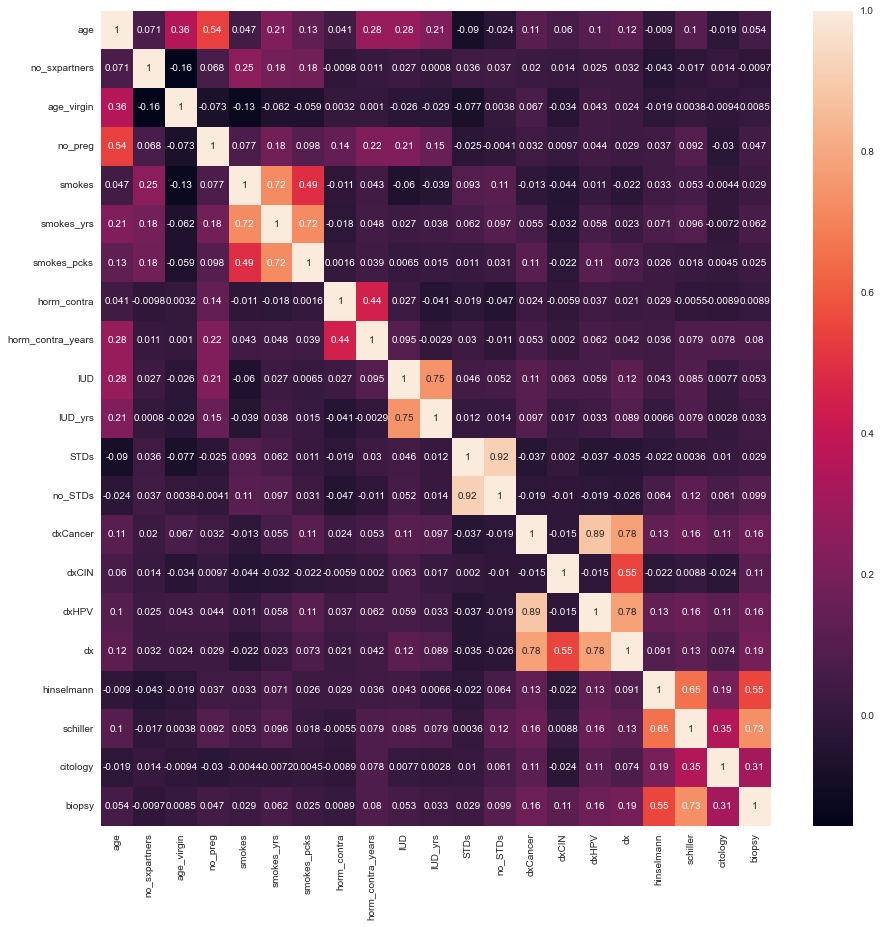

In [29]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson').round(4), annot=True)
plt.show()

## Is there correlation betweeen any of the risk factors?

### Using the Pearson correlation coeffcient:

#### __1. Less than 0.29:__ 
 - The majority of the risk factors have a correlation of less than 0.2 suggesting that there is very low correlation
 
#### __2. Between 0.30 and 0.59:__
- These values suggest low to moderate correlation. Some examples include:
    - Age vs Number of sexual partners 
    - Years smoked vs Yearly Packs smoked
    - Age vs Number of pregnancies 
    - The use of hormonal contraceptives vs the number of hormonal contraceptives used 
    - hinselmann vs citology/biopsy
- Most of hese correlation valeus are expected since these specific risk factors are obviously linked
- More in-depth exploration should be used to see why Hinselmann vs Citology/Biopsy have slightly and relatively "stronger" correlation
    
#### __3. .60 and Up:__
- These values suggest high/very high correlation. Some examples include:
    - Smokes vs years smoked
    - IUD use vs IUD use (years)
    - biopsy vs schiller
    - hinselman vs schiller
    - the diganoses columns vs each other
 - Again most of these variables with high correlation are expected
 - The sceening columns must be explored more 
    
Based on the correlation values, the numbers themselves make sense. The risk factors that are obviously corrleated have a higer pearson correlation coeffecient. In contrast, the majority of the risk factors that do not have any obvious correlation have very low correlation. From this data, regression analysis or further correlation analysis may be difficult with simple EDA. 

As with many factors, single variables are not expected to show strong correlation. It is often the combination of multiple factors that will lead to correlation. 

For my case, more statistical/technical knowledge is needed to properly work with the data.

Because of this, trends and analysis of the data will be soley based on looking at the distribution of the data with repect to having a postive diagnosis for cervical cancer. 

# 3. Look at the distribution of the data as a whole:

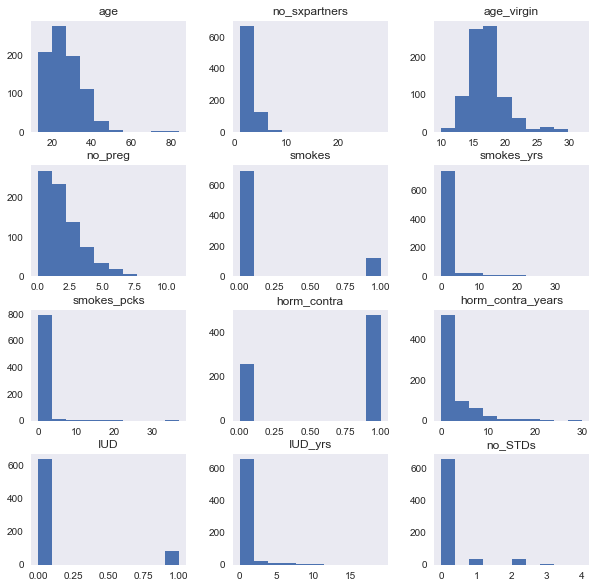

In [30]:
df.hist(figsize=(10,10), grid=False);

Based off the distribution and the data (data that is not just 1 or 0), these are the main risk factors that I will focus on:

1. age
2. no_sxpartners
3. age_virgin
4. no_preg
5. STDs
6. IUD*



Descriptive Statistics:

1. What are the means and ranges for these values?
2. Are there outliers?
    

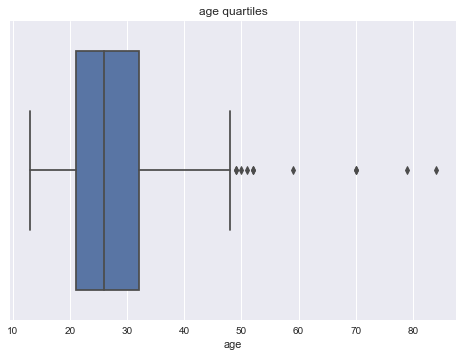

count    835.000000
mean      27.023952
std        8.482986
min       13.000000
25%       21.000000
50%       26.000000
75%       32.000000
max       84.000000
Name: age, dtype: float64


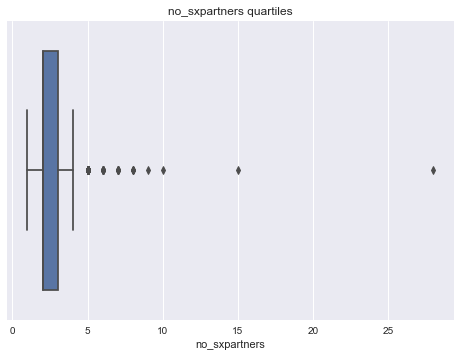

count    810.000000
mean       2.551852
std        1.676686
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: no_sxpartners, dtype: float64


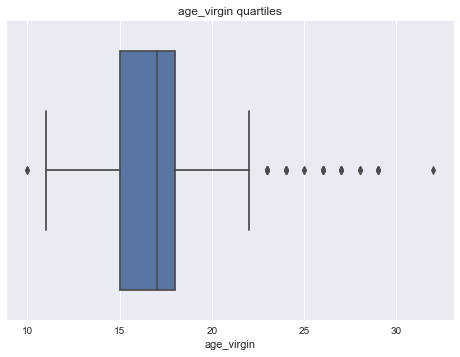

count    828.000000
mean      17.020531
std        2.817000
min       10.000000
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: age_virgin, dtype: float64


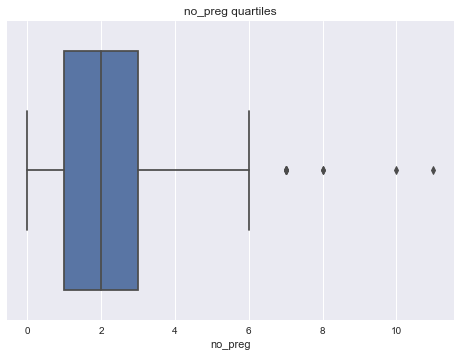

count    779.000000
mean       2.304236
std        1.455817
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: no_preg, dtype: float64


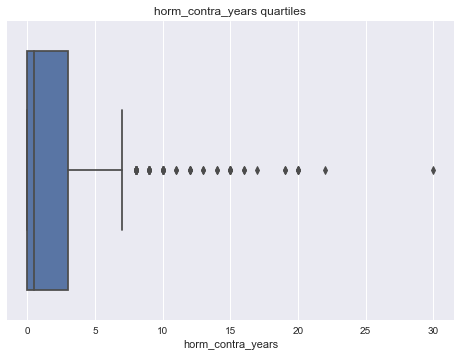

count    732.000000
mean       2.302916
std        3.794180
min        0.000000
25%        0.000000
50%        0.500000
75%        3.000000
max       30.000000
Name: horm_contra_years, dtype: float64


In [31]:
for col in ['age', 'no_sxpartners', 'age_virgin', 'no_preg', 'horm_contra_years']:
    sns.boxplot(x=df[str(col)]).set(title=f'{col} quartiles')
    plt.show()
    print(df[str(col)].describe())

# 4. Look at data trends with a positive diagnosis for cervical cancer

In [32]:
# filtererd data for postive diagnosis 
df_2 = df.loc[df['dx'] == True]

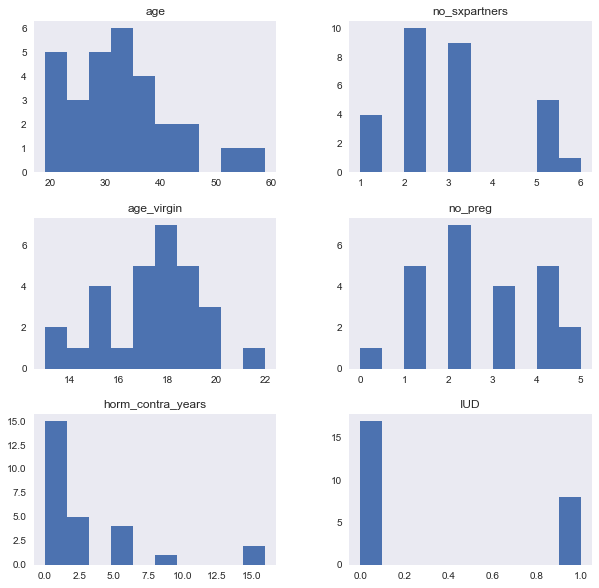

In [33]:
(df_2
 .loc[df_2['dx'] == True, ['age', 'no_sxpartners', 'age_virgin', 
                               'no_preg', 'horm_contra_years', 'IUD']]
).hist(figsize=(10,10), grid=False);


# Age (1/6)

In [34]:
# mean of total sample population without cervical cancer 
round(df.loc[df['dx'] == False].age.mean(),2)

26.83

In [35]:
# mean of cervical cancer population 
round(df_2.age.mean(),2)

32.34

<AxesSubplot:title={'center':'Age Distribution of Cancer Diagnosis'}>

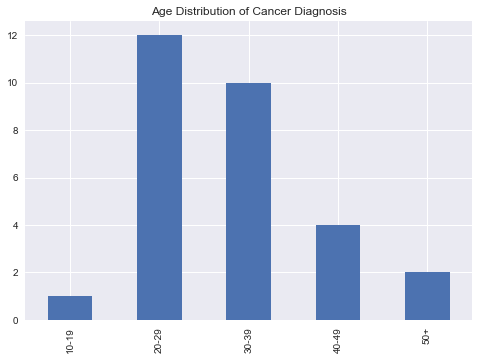

In [36]:
df_2.age_ranges.value_counts().sort_index().plot(kind='bar', title='Age Distribution of Cancer Diagnosis')

__Observation:__ Cervical cancer patients seem to be older on average than those that do not have cervical cancer. 

# Number of Sexual Partners (2/6)

In [37]:
# mean of total sample population without cervical cancer 
round(df.loc[df['dx'] == False].no_sxpartners.mean(),2)

2.54

In [38]:
# mean of cervical cancer population 
round(df_2.no_sxpartners.mean(),2)

2.83

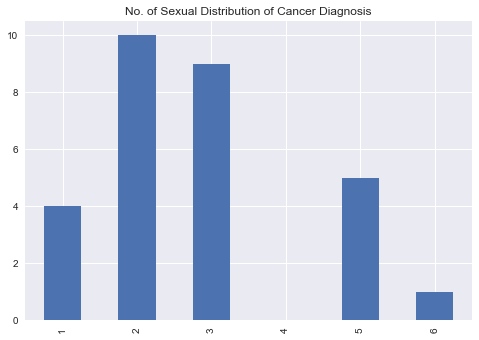

In [39]:
(df_2['no_sxpartners']
 .value_counts().sort_index()
 .reindex(range(int(df_2['no_sxpartners'].value_counts().index.min()),
                int(df_2['no_sxpartners'].value_counts().index.max())+1)
         )
).fillna(0).plot(kind='bar', title='No. of Sexual Distribution of Cancer Diagnosis');

__Observation:__ Cervical cancer patients seem to have marginally more sexual partners on average than those that do not have cervical cancer. 

# Age that Individual Lost Their Virginity (3/6)

In [40]:
# mean of total sample population without cervical cancer 
round(df.loc[df['dxCancer'] == False].age_virgin.mean(),2)

16.99

In [41]:
# mean of cervical cancer population 
round(df_2.age_virgin.mean(),2)

17.38

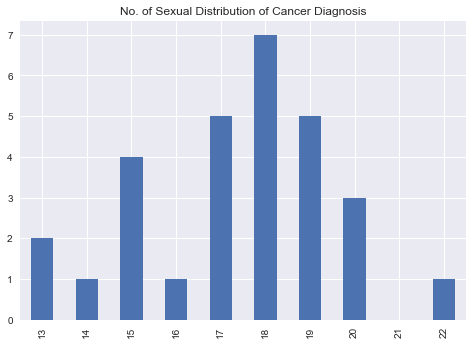

In [42]:
(df_2['age_virgin']
 .value_counts().sort_index()
 .reindex(range(int(df_2['age_virgin'].value_counts().index.min()),
                int(df_2['age_virgin'].value_counts().index.max())+1)
         )
).fillna(0).plot(kind='bar', title='No. of Sexual Distribution of Cancer Diagnosis');

__Observation:__ Cervical cancer patients seem to be older on average when losing their virginity than those that do not have cervical cancer. 

# Number of Pregnancies (4/6)

In [43]:
# mean of total sample population without cervical cancer 
round(df.loc[df['dx'] == False].no_preg.mean(),2)

2.3

In [44]:
# mean of cervical cancer population 
round(df_2.no_preg.mean(),2)

2.54

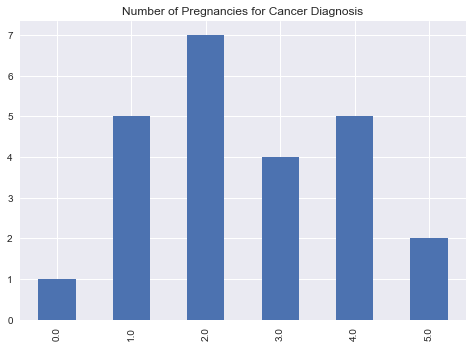

In [45]:
df_2.no_preg.value_counts().sort_index().plot(kind='bar', title='Number of Pregnancies for Cancer Diagnosis');

__Observation:__ Cervical cancer patients seem to have marginally more pregnanies on average than those that do not have cervical cancer. 

# Diagnosed with an STD 5/6

In [46]:
# mean of total sample population without cervical cancer 
round(df.loc[df['dx'] == False].STDs.mean(),2)

0.22

In [47]:
# mean of cervical cancer population 
round(df_2.STDs.mean(),2)

0.14

<AxesSubplot:title={'center':'STD for Total Sample'}, ylabel='STDs'>

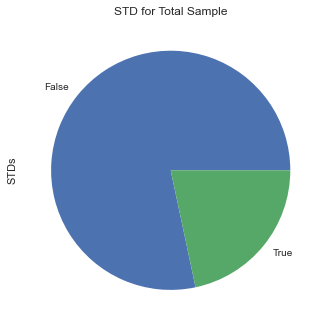

In [48]:
df.loc[df['dxCancer'] == False].STDs.value_counts().plot(kind='pie', title='STD for Total Sample')

<AxesSubplot:title={'center':'STD with Cancer Diagnosis'}, ylabel='STDs'>

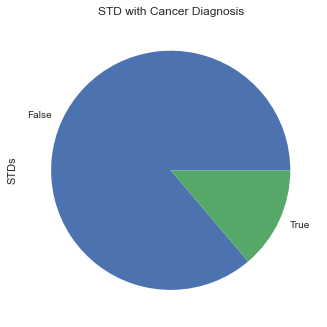

In [49]:
df_2.STDs.value_counts().plot(kind='pie', title='STD with Cancer Diagnosis')

# IUD (6/6)

__Observation:__ Cervical cancer patients seem to have a lower proportion of STD-postive indivuals on average than those that do not have cervical cancer. 

In [50]:
# mean of total sample population 
round(df.IUD.mean(),2)

0.11

In [51]:
# mean of cervical cancer population 
round(df_2.IUD.mean(),2)

0.32

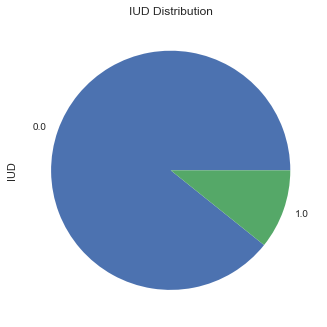

In [52]:
df.loc[df['dx'] == False].IUD.value_counts().sort_index().plot(kind='pie', title='IUD Distribution');

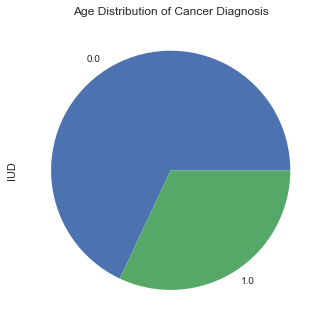

In [53]:
df_2.IUD.value_counts().sort_index().plot(kind='pie', title='Age Distribution of Cancer Diagnosis');

__Observation:__ Cervical cancer patients seem have a higher proprtion of IUD users on average than those that do not have cervical cancer. 

# Conclusions for Future Work 



## On the Analysis:
1. This dataset was limited to a very small population size
2. Analysis was limtied by my technical ability and therfore was limited to basic EDA
3. Correlation on a single variable basis is impractical for this type of data and requires more mathematical legwork to work with and extract insights from 


## Elementary Takeaway from Data:
1. Age, Number of Sexual Partners, Number of Pregnancies, and the age that individuals lost their virginity have differing means and distributions in the postive cervical cancer population versus the negative cerivcal canver population 
    - these values show higher means/postive skews in positive cancer patients compared to negative cancer patients 
    - age is a known risk factor
    - Number of pregancies and Number of sexual partners have a higher correlation with age
        - Therefore their differing means/distribtion may be a result of that and not due to any underlying differences between postive and negative cervical cancer patients
 2. The cervical cancer population reported a lower proportion of having a postive STD than the population that does not have cervical cancer
     - While the difference is not known to be significant or not, this may be due to the general trend of populations having an already low percentage of STD-postive individuals 
3. IUD use is found to be higher in proportion in cervical cancer patients than those that do not have it 
    - this is in contrast to the research literature that states that IUD use is actually a factor that lowers cervical cancer risk 
    - further analysis is needed 
    
## Future:
1. Use statistical tests to see if numeric differences are significant 
2. Focus on more specific risk factors so that I can dive deeper 
3. Seek out other datasets
4. Ask more specific questions
5. Improve on technical skills and develop stronger analysis 
6. Consider learning and implementing prediction models and/or various other statistical techniques to deal with this data

